# Arctic regions geospatial wrangling
## Week 6 - Discussion section
### Peter Vitale

In this discussion section you will wrangle geospatial data about Arctic communities



In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df = gpd.read_file("data/arctic_communities.geojson")

## Check geometry types

In [3]:

def check_polygons(df):
    if len(df.geom_type.unique()) == 1:
        print(f'Your single geometry is {df.geom_type.unique()}')
    else:
        print(f'WARNING! Multiple geometries detected: \n {df.geom_type.unique()}')

In [4]:
check_polygons(df)

WARNING! Multiple geometries detected: 
 ['MultiPolygon' 'Polygon']


<Axes: >

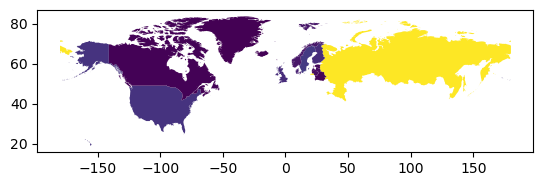

In [5]:
df.plot(column='n_communities')

### Explode Polygons

In [6]:
df = df.explode(column ='geometry', 
                index_parts = False).reset_index()

In [7]:
check_polygons(df)

Your single geometry is ['Polygon']


## 4 Compute minimum y-coords for polygons

In [ ]:
df.iloc[0,]

pandas.core.series.Series

Series

In [15]:
shape = df.geometry.iloc[0,]

In [16]:
shape.bounds[1]

56.511035156249996

In [29]:
def min_y(row):
   return row.geometry.bounds[1]
   

In [32]:
df['miny'] = df.apply(min_y, axis = 1 )

In [35]:
arctic_countries = df[df['miny']>= 40]

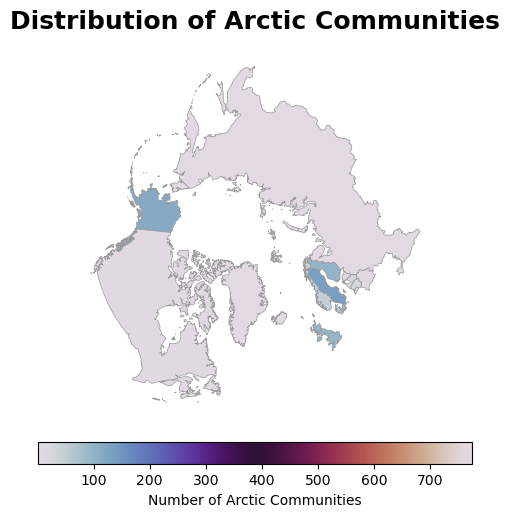

In [38]:
import matplotlib.pyplot as plt
arctic_countries = arctic_countries.to_crs('epsg:3413')
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
arctic_countries.plot(
    ax=ax,
    column='n_communities',
    cmap='twilight',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', fontsize=18, weight='bold', pad=15)

plt.show()